#**COVID 19 Analysis Project**

- Given the data about covid 19 patients write code to visualize the impact and analyze the trend of the rate of infection and recovery as well as make predictions.
- The predictions will be made about the number of cases expected in a week in future based on the current trends.

**GUIDELINES:**

- Use plotly (visualization library) to create interactive visualizations.
- Use Facebook prophet library to make time series models.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('/content/covid_19_clean_complete (1).csv')
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [3]:
df.shape

(49068, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [5]:
df.rename(columns= {'Province/State' : 'State' , 'Country/Region': 'Country'}, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   State       14664 non-null  object 
 1   Country     49068 non-null  object 
 2   Lat         49068 non-null  float64
 3   Long        49068 non-null  float64
 4   Date        49068 non-null  object 
 5   Confirmed   49068 non-null  int64  
 6   Deaths      49068 non-null  int64  
 7   Recovered   49068 non-null  int64  
 8   Active      49068 non-null  int64  
 9   WHO Region  49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [7]:
df.isna().sum()

State         34404
Country           0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
WHO Region        0
dtype: int64

In [8]:
df['State'].unique()

array([nan, 'Australian Capital Territory', 'New South Wales',
       'Northern Territory', 'Queensland', 'South Australia', 'Tasmania',
       'Victoria', 'Western Australia', 'Alberta', 'British Columbia',
       'Manitoba', 'New Brunswick', 'Newfoundland and Labrador',
       'Nova Scotia', 'Ontario', 'Prince Edward Island', 'Quebec',
       'Saskatchewan', 'Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu',
       'Guangdong', 'Guangxi', 'Guizhou', 'Hainan', 'Hebei',
       'Heilongjiang', 'Henan', 'Hong Kong', 'Hubei', 'Hunan',
       'Inner Mongolia', 'Jiangsu', 'Jiangxi', 'Jilin', 'Liaoning',
       'Macau', 'Ningxia', 'Qinghai', 'Shaanxi', 'Shandong', 'Shanghai',
       'Shanxi', 'Sichuan', 'Tianjin', 'Tibet', 'Xinjiang', 'Yunnan',
       'Zhejiang', 'Faroe Islands', 'Greenland', 'French Guiana',
       'French Polynesia', 'Guadeloupe', 'Mayotte', 'New Caledonia',
       'Reunion', 'Saint Barthelemy', 'St Martin', 'Martinique', 'Aruba',
       'Curacao', 'Sint Maarten', 'Bermud

In [9]:
df.drop(columns = ['State'], inplace=True)

In [10]:
df.head()

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


**Get the country vise total confirmed, active, recovered and death cases.**

In [11]:
df['Country'].nunique()

187

In [13]:
country_sum = df.groupby('Country')[['Confirmed', 'Deaths',	'Recovered',	'Active']].sum().reset_index()
country_sum

,Country,Confirmed,Deaths,Recovered,Active
0,Afghanistan,1936390,49098,798240,1089052
1,Albania,196702,5708,118877,72117
2,Algeria,1179755,77972,755897,345886
3,Andorra,94404,5423,69074,19907
4,Angola,22662,1078,6573,15011
...,...,...,...,...,...
182,West Bank and Gaza,233461,1370,61124,170967
183,Western Sahara,901,63,648,190
184,Yemen,67180,17707,23779,25694
185,Zambia,129421,2643,83611,43167


**Plot the 10 countries with most confirmed cases.**

In [16]:
top10_conf = country_sum.nlargest(10, 'Confirmed')
top10_conf

,Country,Confirmed,Deaths,Recovered,Active
173,US,224345948,11011411,56353416,156981121
23,Brazil,89524967,3938034,54492873,31094060
138,Russia,45408411,619385,25120448,19668578
79,India,40883464,1111831,23783720,15987913
157,Spain,27404045,3033030,15093583,9277432
177,United Kingdom,26748587,3997775,126217,22624595
85,Italy,26745145,3707717,15673910,7363518
61,France,21210926,3048524,7182115,10980287
65,Germany,21059152,871322,17107839,3079991
81,Iran,19339267,1024136,15200895,3114236


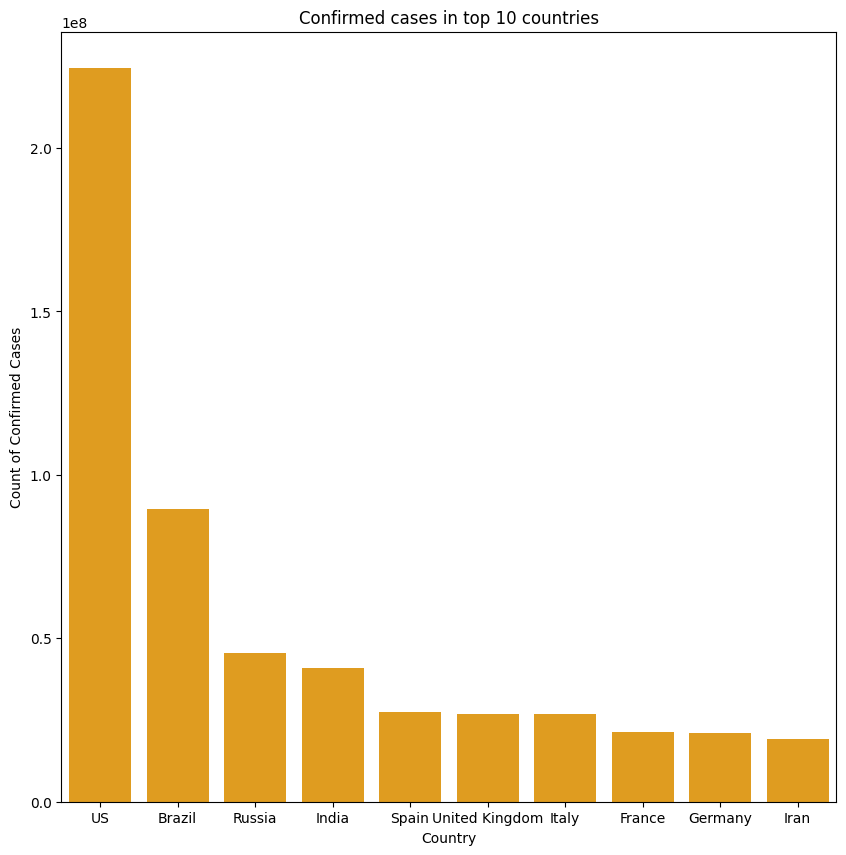

In [20]:
plt.figure(figsize=(10,10))
sns.barplot(x = top10_conf['Country'], y = top10_conf['Confirmed'], color='orange')
plt.xlabel('Country')
plt.ylabel('Count of Confirmed Cases')
plt.title('Confirmed cases in top 10 countries')
plt.show()

**Plot the 10 countries with most active cases.**

**Plot the 10 countries with most deaths.**

**Using plotly to visualize the confirmed cases on world map**

In [23]:
fig = px.choropleth(country_sum, locations = 'Country', locationmode = 'country names' , hover_name = 'Country',
                    color = 'Confirmed', title = 'Confirmed Cases Over Countries', color_continuous_scale = 'Peach')
fig.show()

**Using plotly to visualize the Deaths on world map.**

**FBProphet**:

- FaceBook Prophet
- it is open source tool for forecasting the time series data

**Time Series using fbprophet**

**For Deaths**

1 col : date

2 : deaths data

In [24]:
death_cases = df.groupby('Date')['Deaths'].sum().reset_index()
death_cases

,Date,Deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


In [25]:
death_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    188 non-null    object
 1   Deaths  188 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.1+ KB


In [26]:
death_cases.columns = ['ds', 'y']  #renaming columns as mandatory for passing into fbprophet
death_cases['ds'] = pd.to_datetime(death_cases['ds'])  #changed ds column to date time format
death_cases.info()

#ds represents date column, y represents data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      188 non-null    datetime64[ns]
 1   y       188 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.1 KB


In [28]:
from prophet import Prophet

#in case above command dosent work, first run !pip install prophet

In [29]:
#created an object of model
model = Prophet(interval_width = 0.95)

In [30]:
model.fit(death_cases)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbabpa6ec/5du2gvw6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbabpa6ec/ku9ru6_l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66798', 'data', 'file=/tmp/tmpbabpa6ec/5du2gvw6.json', 'init=/tmp/tmpbabpa6ec/ku9ru6_l.json', 'output', 'file=/tmp/tmpbabpa6ec/prophet_modelirbldc9j/prophet_model-20240630163042.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:30:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:30:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


**Create future dates**

In [46]:
future_dates = model.make_future_dataframe(periods = 14, freq = 'D')  #creating new dates where i need to make forecast
future_dates

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
197,2020-08-06
198,2020-08-07
199,2020-08-08
200,2020-08-09


**Making the future Forecast**

In [47]:
forecast = model.predict(future_dates)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-522.113015,-3633.511549,2308.557347,-522.113015,-522.113015,-191.187036,-191.187036,-191.187036,-191.187036,-191.187036,-191.187036,0.0,0.0,0.0,-713.300051
1,2020-01-23,-432.419147,-3159.668645,2994.409422,-432.419147,-432.419147,388.672090,388.672090,388.672090,388.672090,388.672090,388.672090,0.0,0.0,0.0,-43.747057
2,2020-01-24,-342.725280,-2392.892094,3340.906221,-342.725280,-342.725280,874.263328,874.263328,874.263328,874.263328,874.263328,874.263328,0.0,0.0,0.0,531.538048
3,2020-01-25,-253.031412,-2599.744341,3470.798959,-253.031412,-253.031412,726.888550,726.888550,726.888550,726.888550,726.888550,726.888550,0.0,0.0,0.0,473.857138
4,2020-01-26,-163.337545,-3297.565255,2661.138660,-163.337545,-163.337545,-165.600810,-165.600810,-165.600810,-165.600810,-165.600810,-165.600810,0.0,0.0,0.0,-328.938355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,2020-08-06,698308.575523,690795.083750,708877.860827,690347.635565,707487.605070,388.672090,388.672090,388.672090,388.672090,388.672090,388.672090,0.0,0.0,0.0,698697.247613
198,2020-08-07,703337.982946,694292.443416,714513.542173,693796.137234,713739.293277,874.263328,874.263328,874.263328,874.263328,874.263328,874.263328,0.0,0.0,0.0,704212.246274
199,2020-08-08,708367.390369,698176.933454,720827.548072,697495.179239,720251.144961,726.888550,726.888550,726.888550,726.888550,726.888550,726.888550,0.0,0.0,0.0,709094.278919
200,2020-08-09,713396.797793,701505.657417,726534.672305,701333.138021,726888.643249,-165.600810,-165.600810,-165.600810,-165.600810,-165.600810,-165.600810,0.0,0.0,0.0,713231.196982


In [48]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          202 non-null    datetime64[ns]
 1   trend                       202 non-null    float64       
 2   yhat_lower                  202 non-null    float64       
 3   yhat_upper                  202 non-null    float64       
 4   trend_lower                 202 non-null    float64       
 5   trend_upper                 202 non-null    float64       
 6   additive_terms              202 non-null    float64       
 7   additive_terms_lower        202 non-null    float64       
 8   additive_terms_upper        202 non-null    float64       
 9   weekly                      202 non-null    float64       
 10  weekly_lower                202 non-null    float64       
 11  weekly_upper                202 non-null    float64       

In [49]:
forecast[['yhat', 'yhat_lower', 'yhat_upper']] = forecast[['yhat', 'yhat_lower', 'yhat_upper']].astype(int)

In [50]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-22,-713,-3633,2308
1,2020-01-23,-43,-3159,2994
2,2020-01-24,531,-2392,3340
3,2020-01-25,473,-2599,3470
4,2020-01-26,-328,-3297,2661
...,...,...,...,...
197,2020-08-06,698697,690795,708877
198,2020-08-07,704212,694292,714513
199,2020-08-08,709094,698176,720827
200,2020-08-09,713231,701505,726534


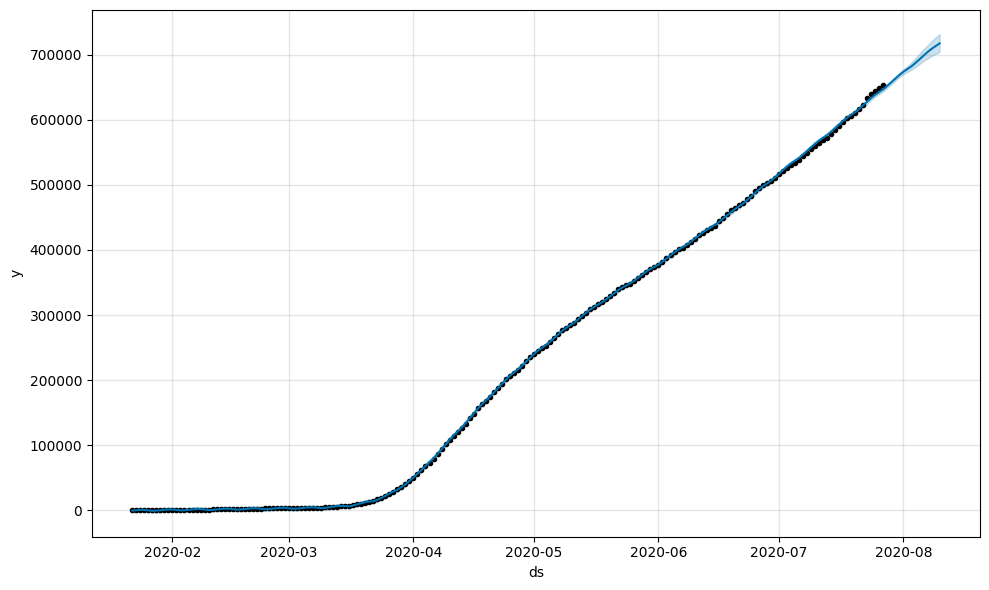

In [51]:
deaths_forecast = model.plot(forecast)

**From the above graph, the black dots represents the actual data of deaths, blue line represents the forecast of deaths, blue small range represents the confidnece interval of forecast.**